# How to lower the depth of a quantum circuit quadratically?

Sakibul Islam Sazzad

Incoming PhD Student (Fall'22), University of New Mexico

Bangladesh Reference Institute for Chemical Measurements


*Disclaimer: This writing is focused only for a GHZ like quantum states of 8 qubits- $\frac{1}{\sqrt{2}}(|00000000\rangle+|11111111\rangle)$*

Firstly, we will talk about GHZ circuit. Its a extension of bell pair entanglement circuit for 3 qubits. To create a bell pair that shows entanglement we need a **H-gate** and **CNOT-gate** with control on the first qubit and target on the second qubit. The quantum ciruit of the bell pair states will look like this.

In [9]:
import numpy as np


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *


from qiskit.providers.aer import AerSimulator


In the previous cell we imported some necessary libraries, although for this writing QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister and execute should be enough. Now we will make a quantum ciruit of 2 qubits. To do this we will need QuantumCiruit package to defin a quanutm circuit, and we may use QuantumRegsiter and ClassicalRegister of 2 qubits to create a quantum circuit using quantum gates and after that to measure the qubit states we will need classical register of 2 bits. To measure the qubits states we have to execute the quantum ciruit on Aer simulator. 



In [2]:
qc = QuantumCircuit(2,2) # here first 2 is quantum regsiter for 2 qubits, while second 2 is for classical register so that we can measure

qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1

Now we will measure the quantum states of the 2 qubits to check that the above circuit shows us only two states 00 and 11. The circuit should show only two states cause bell pair states look like this- $\frac{1}{\sqrt{2}}(|00\rangle+11\rangle)$

In [10]:
simulator = AerSimulator()
result= simulator.run(qc).result()
counts = result.get_counts()
print(counts)


{'11 00': 506, '00 00': 518}


In the counts we can see that '11' has been measured in the quantum circuit by 506 times out of 1024 times and '00' has been measured in the circuit is 518 times. 

Now we will make a quantum circuit of GHZ state which states look like $\frac{1}{\sqrt{2}}(|000\rangle+|111\rangle)$ GHZ circuit can be made two ways, we will introduce both of them so that we can extend the ideas of binary tree for a larger  number of qubits. First ways of creating a GHZ state will be one by one ladder of CNOT gates, that means- GHZ circuit can be created by inserting cx gate one qubit after one qubit. I will look like the following code snippet

In [14]:
qc=QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()
qc.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [15]:
simulator = AerSimulator()
result= simulator.run(qc).result()
counts = result.get_counts()
print(counts)


{'000 000': 532, '111 000': 492}


Here we can see that 000 and 111 states are created.

Now the another alternative way of making GHZ circuit will always make the control of the **CNOT** gate from the 0th qubit. Here it is and it will provide us same results as the first one

In [17]:
qc2= QuantumCircuit(3,3)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(0,2)
qc2.measure_all()
qc2.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [18]:
simulator = AerSimulator()
result= simulator.run(qc2).result()
counts = result.get_counts()
print(counts)


{'111 000': 499, '000 000': 525}


See we have got the same results

Now we will extend this idea for 8 qubit GHZ like states. At first lets get introduce to the depth of a quantum circuit. What will be the depth of the quanutm circuit as the previous cell. Lets considet the *qc2* circuit. what is the depth of that circuit. Qiskit has a very useful tool for this *depth()* for finding a number of depth in a circuit. Before using the *depth()* lets remove the mesaure of the circuit

In [21]:
qc2= QuantumCircuit(3,3)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(0,2)

depth = qc2.depth()
print(depth)

3


We can see that the depth of the circuit is 3. Basically first layer of the depth is *H-gate*, second layer comes from a *CNOT-gate* and the final and third layer comes from the last *CNOT* gate.

Now, what will be depth if we want to create a GHZ-like state for a 8 qubit as we created GHz state of 3 qubits. Yeah, you guessed correctly it should be 8, our target is to reduce the number, can we do that? lets check!!!

In [25]:
ghz_like = QuantumCircuit(8,8)

qubits = 8
ghz_like.h(0)
for i in range(8):
    if i == 7:
        break
    else:
        ghz_like.cx(0, i+1)

ghz_like.draw()


┌───┐                                   
q_0: ┤ H ├──■────■────■────■────■────■────■──
     └───┘┌─┴─┐  │    │    │    │    │    │  
q_1: ─────┤ X ├──┼────┼────┼────┼────┼────┼──
          └───┘┌─┴─┐  │    │    │    │    │  
q_2: ──────────┤ X ├──┼────┼────┼────┼────┼──
               └───┘┌─┴─┐  │    │    │    │  
q_3: ───────────────┤ X ├──┼────┼────┼────┼──
                    └───┘┌─┴─┐  │    │    │  
q_4: ────────────────────┤ X ├──┼────┼────┼──
                         └───┘┌─┴─┐  │    │  
q_5: ─────────────────────────┤ X ├──┼────┼──
                              └───┘┌─┴─┐  │  
q_6: ──────────────────────────────┤ X ├──┼──
                                   └───┘┌─┴─┐
q_7: ───────────────────────────────────┤ X ├
                                        └───┘
c: 8/════════════════════════════════════════

depth of the above circuit will be 8

In [26]:
ghz_like.depth()

8

Now we will reduce the depth of circuit using binary tree. Binary tree starts with a node and two edges, and the two edges ends in two nodes, then the two nodes will create another two edges and it will go on. Basically each node will create two nodes and the number of nodes will increase with the power of 2. 

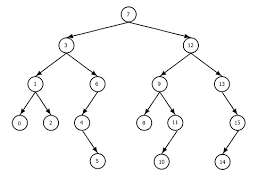

We will use this binary tree on the above circuit. But in thi case our node will be only *CNOT* gate and in each layer of the depth the number of CNOT gate will be equivalent to the number of layer. For example on first layer we should have only 1 CNOT gate, on the second layer we will have only 2 CNOT gate, in third layer we will have 4 CNOT gates. So that means for our GHZ like circuit we will need only 3 layer of CNOT gate (1+2+4=7 CNOT gates). So the total depth of the circuit be 4. 

Now issue is how we the CNOT gate will take place, for this we will binary search. In bianry search algorithm to find a value in a list we need to at first half the list, then once again make the half of the first half. Such as, to find 2 from 1, 2, 3, 4, 5, 6, 7, 8 we will first make it halves. On first half there will be 1, 2, 3, 4 and rest half will be 5, 6, 7, 8.  Then we will make half of the first half it will be 1,2 and 3,4. Other halves will be 5,6 and 7, 8. Now we have found the 2 on our doing halves for third times. We will insert cx gate in the same way. 

In [27]:
ghz_8 = QuantumCircuit(8,8)

ghz_8.h(0)

#first layer of cx gate has only 1 cx
ghz_8.cx(0,4)

#second layer has 2 cx gates and cx gate inserted by following binary search algo
ghz_8.cx(0,2)
ghz_8.cx(4,6)

#third layer has 3 cx gates
ghz_8.cx(0,1)
ghz_8.cx(2,3)
ghz_8.cx(4,5)
ghz_8.cx(6,7)

ghz_8.draw()



┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘  │    │  ┌─┴─┐
q_1: ───────┼────┼──┤ X ├
            │  ┌─┴─┐└───┘
q_2: ───────┼──┤ X ├──■──
            │  └───┘┌─┴─┐
q_3: ───────┼───────┤ X ├
          ┌─┴─┐     └───┘
q_4: ─────┤ X ├──■────■──
          └───┘  │  ┌─┴─┐
q_5: ────────────┼──┤ X ├
               ┌─┴─┐└───┘
q_6: ──────────┤ X ├──■──
               └───┘┌─┴─┐
q_7: ───────────────┤ X ├
                    └───┘
c: 8/════════════════════

In [28]:
ghz_8.depth()

4

In [31]:
ghz_8.measure_all()
simulator = AerSimulator()
result= simulator.run(ghz_8).result()
counts = result.get_counts()
print(counts)


{'11111111 00000000': 510, '00000000 00000000': 514}


See we have reduced the number of depth drastically and can you do the same thing for any n qubits? If you are interested to proof it for any qubits lets do a collaboration. Email me at: sakibulislamsazzad[at]gmail[dot]com